# Exploratory Data Analysis Books Recommendation System

## Introduction
There is no better way to explore and gain familiarity with the dataset than to take a closer look at it and analyse main characteristics through the lens or steps of EDA.

The objectives of an EDA notebook are as follows:

    * Gain understanding of the data and possibly find clues;
    * Formulate hypothesis for modelling;
    * Check for rarities that may impact the forecasting model.


## Libraries

First of all, a few libraries are needed to work with and plot the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv
from tqdm import tqdm
import json
import re

## Visualization enhancement
Secondly, adjust plots size for better visualization experience.

#### Increase the size of plots to be able to see detailed visualizations clear

In [2]:
plt.rcParams["figure.figsize"] = [25, 10]
plt.rcParams.update({'font.size': 24})

## Dataset

Finally, download the initial data supplied and analyze it. 

The data resource contains three connected tables, which will be joined by the mutual values in a dependent column. Merging is implemented to gain a clearer view of all data in one bigger table, which will represent the most important source of information as it is the source of user age and ratings of books. Therefore, to implement the main functionality of the system, namely personalized books recommendation, users and books interplay is indispensable.

Load the three connected tables - Users, Books & Books Ratings.

In [3]:
df_users = pd.read_csv('BX-Users.csv', error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1') 
df_users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [4]:
df_books = pd.read_csv('BX-Books.csv', error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1')
df_books

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\HOME\anaconda3\lib\site-packages\IPython\core\interactiveshell.py

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [5]:
df_ratings = pd.read_csv('BX-Book-Ratings.csv', error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1')
df_ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


At first glance, all of the loaded tables contain a great amount of records. User information includes age and location only, while book-descriptive attributes contain more detailed data. The last table holds the ratings provided by each user for a book. Unite all three datasets to get a better understanding.

#### Merge datasets
Merge tables users & ratings using inner join on user id. This will extract all users who have rated books. The users who do not have rating records will be left behind, as they do not serve any meaningful purpose in terms of knowledge for the product goal. In other words, the books ratings table rows will be enriched with the corresponding information for the user who is rating on each row, gathered from table users. Then, merge the new dataset with the books table, but this time with inner join on the isbn column. In the same way, the new previously merged table will be further enriched with book descriptive columns for each rated book.

In [6]:
df = pd.merge(df_ratings, df_users, on='User-ID', how='inner')
df

,User-ID,ISBN,Book-Rating,Location,Age
0,276725,034545104X,0,"tyler, texas, usa",NaN
1,276726,0155061224,5,"seattle, washington, usa",NaN
2,276727,0446520802,0,"h, new south wales, australia",16.0
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,"rijeka, n/a, croatia",16.0
...,...,...,...,...,...
1149775,276704,1563526298,9,"cedar park, texas, usa",NaN
1149776,276706,0679447156,0,"quebec, quebec, canada",18.0
1149777,276709,0515107662,10,"mannington, west virginia, usa",38.0
1149778,276721,0590442449,10,"providence, rhode island, usa",14.0


In [7]:
df = pd.merge(df, df_books, on='ISBN', how='inner')
df

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,"fort lee, new jersey, usa",NaN,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,"fort lee, new jersey, usa",NaN,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,"wakeman, ohio, usa",43.0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,"cedar park, texas, usa",NaN,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


#### Split location into three new columns
Extract city, state and country in 3 separate columns, because this way clearer vision of the location is provided and the separated columns can be included in more observations regarding users.  

In [8]:
# Create the new columns
location = df.Location.str.split(', ', n=2, expand=True)
location.columns=['city', 'state', 'country']

df['city'] = location['city']
df['state'] = location['state']
df['country'] = location['country']

# Adjust the position of the newly added columns to be right after column Location
cities = df['city']
df.drop(labels=['city'], axis=1, inplace = True)
df.insert(4, 'city', cities)

states = df['state']
df.drop(labels=['state'], axis=1, inplace = True)
df.insert(5, 'state', states)

countries = df['country']
df.drop(labels=['country'], axis=1, inplace = True)
df.insert(6, 'country', countries)

In [9]:
df

,User-ID,ISBN,Book-Rating,Location,city,state,country,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",tyler,texas,usa,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",cincinnati,ohio,usa,23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",strafford,missouri,usa,34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",st. charles county,missouri,usa,2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",beaverton,oregon,usa,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,"fort lee, new jersey, usa",fort lee,new jersey,usa,NaN,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,"fort lee, new jersey, usa",fort lee,new jersey,usa,NaN,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,"wakeman, ohio, usa",wakeman,ohio,usa,43.0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,"cedar park, texas, usa",cedar park,texas,usa,NaN,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


Column 'Location' is successfully divided in 3 newer ones.

#### NaN values
Awareness of NaN values is indispensable and replacing these with more accurate values if possible, is encouraged. 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   ISBN                 1031136 non-null  object 
 2   Book-Rating          1031136 non-null  int64  
 3   Location             1031136 non-null  object 
 4   city                 1031136 non-null  object 
 5   state                1031136 non-null  object 
 6   country              1006941 non-null  object 
 7   Age                  753301 non-null   float64
 8   Book-Title           1031136 non-null  object 
 9   Book-Author          1031135 non-null  object 
 10  Year-Of-Publication  1031136 non-null  object 
 11  Publisher            1031134 non-null  object 
 12  Image-URL-S          1031136 non-null  object 
 13  Image-URL-M          1031136 non-null  object 
 14  Image-URL-L          1031132 non-null  object 
dty

Luckily, most columns do not have null values. A cell with unavailable book author, as well as two for publisher can be found. Nevertheless, column age contains many NaN values. Make an attempt to handle these irrelevant values.

##### Book Author

In [11]:
df.loc[df['Book-Author'].isna()]

,User-ID,ISBN,Book-Rating,Location,city,state,country,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
863398,98647,9627982032,8,"selayang, selangor, malaysia",selayang,selangor,malaysia,26.0,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


Check whether another row in the table holds the same ISBN number. If it does, the book author can be copied from the found result(s).

In [12]:
df.loc[df['ISBN'] == '9627982032']

,User-ID,ISBN,Book-Rating,Location,city,state,country,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
863398,98647,9627982032,8,"selayang, selangor, malaysia",selayang,selangor,malaysia,26.0,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


Unfortunately, this table cannot provide the name of the author. It is rated only once, however it is feasible to find the missing information on the Internet and fill it in.

In [13]:
df.loc[df.ISBN=='9627982032','Book-Author']='Larissa Anne Downe'

In [14]:
df.loc[df['ISBN'] == '9627982032']

,User-ID,ISBN,Book-Rating,Location,city,state,country,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
863398,98647,9627982032,8,"selayang, selangor, malaysia",selayang,selangor,malaysia,26.0,The Credit Suisse Guide to Managing Your Perso...,Larissa Anne Downe,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


Missing value successfully filled in.

##### Publisher
Proceed with publisher missing data in the same way.

In [15]:
df.loc[df['Publisher'].isna()]

,User-ID,ISBN,Book-Rating,Location,city,state,country,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
862973,98391,193169656X,9,"morrow, georgia, usa",morrow,georgia,usa,52.0,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
862984,98391,1931696993,9,"morrow, georgia, usa",morrow,georgia,usa,52.0,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


Check whether the ISBN numbers are repeated somewhere in the dataset.

In [16]:
df.loc[df['ISBN'] == '193169656X']

,User-ID,ISBN,Book-Rating,Location,city,state,country,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
862973,98391,193169656X,9,"morrow, georgia, usa",morrow,georgia,usa,52.0,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...


In [17]:
df.loc[df['ISBN'] == '1931696993']

,User-ID,ISBN,Book-Rating,Location,city,state,country,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
862984,98391,1931696993,9,"morrow, georgia, usa",morrow,georgia,usa,52.0,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


Both ISBNs are only once rated by the same user. Find the information online and fill it in:

In [18]:
df.loc[df.ISBN=='193169656X', 'Publisher']='Novelbooks Incorporated'

In [19]:
df.loc[df.ISBN=='1931696993', 'Publisher']='Bantam'

In [20]:
df.loc[df['ISBN'] == '193169656X']

,User-ID,ISBN,Book-Rating,Location,city,state,country,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
862973,98391,193169656X,9,"morrow, georgia, usa",morrow,georgia,usa,52.0,Tyrant Moon,Elaine Corvidae,2002,Novelbooks Incorporated,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...


In [21]:
df.loc[df['ISBN'] == '1931696993']

,User-ID,ISBN,Book-Rating,Location,city,state,country,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
862984,98391,1931696993,9,"morrow, georgia, usa",morrow,georgia,usa,52.0,Finders Keepers,Linnea Sinclair,2001,Bantam,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


Rows successfully updated.

##### Age
Handle missing values in age column.

Prior to focusing on the merged dataset, check how many unique users with NaN values were there in the df_users table.

In [22]:
df_users[df_users['Age'].isna()]

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
2,3,"moscow, yukon territory, russia",NaN
4,5,"farnborough, hants, united kingdom",NaN
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
...,...,...,...
278849,278850,"sergnano, lombardia, italy",NaN
278853,278854,"portland, oregon, usa",NaN
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


Initially, non-provided age values appear in almost 40% of the users (110 762 out of 278 858 in total). Next, focus on merged dataset.

In [23]:
df_clean = df.loc[df['Age'].isna()]
df_clean

,User-ID,ISBN,Book-Rating,Location,city,state,country,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",tyler,texas,usa,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",beaverton,oregon,usa,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
6,28266,034545104X,0,"portland, oregon, usa",portland,oregon,usa,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
8,39002,034545104X,0,"san jose, ,",san jose,",",None,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
9,50403,034545104X,9,"conway, arkansas, usa",conway,arkansas,usa,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031130,276688,0449907422,0,"fort lee, new jersey, usa",fort lee,new jersey,usa,NaN,Jazz Funeral: A Skip Langdon Novel,Julie Smith,1993,Ballantine Books,http://images.amazon.com/images/P/0449907422.0...,http://images.amazon.com/images/P/0449907422.0...,http://images.amazon.com/images/P/0449907422.0...
1031131,276688,0517145553,0,"fort lee, new jersey, usa",fort lee,new jersey,usa,NaN,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,"fort lee, new jersey, usa",fort lee,new jersey,usa,NaN,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031134,276704,0679752714,0,"cedar park, texas, usa",cedar park,texas,usa,NaN,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


Count the number of unique users with not provided age:

In [24]:
df_clean['User-ID'].nunique()

38219

Currently, 38 219 unique users are with not provided age. This seems a huge amount. How many users are there in total: 

In [25]:
df['User-ID'].nunique()

92106

92 106 users in total. Therefore, more than 40% of the users are with unknown age. 
53 887 users are with provided age. Get statistics on the age column:

Extract in a new table all unique users with provided age and gain statistical insight on the extract. 

In [26]:
df_unique_users_aged = df.loc[df['Age'].notnull()]
df_unique_users_aged = df_unique_users_aged.drop_duplicates(subset=['User-ID'], keep='first')
df_unique_users_aged

,User-ID,ISBN,Book-Rating,Location,city,state,country,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1,2313,034545104X,5,"cincinnati, ohio, usa",cincinnati,ohio,usa,23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",strafford,missouri,usa,34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",st. charles county,missouri,usa,2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,"st. louis, missouri, usa",st. louis,missouri,usa,45.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,"springfield, missouri, usa",springfield,missouri,usa,24.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030957,276262,0741411504,0,"santa fe, new mexico, usa",santa fe,new mexico,usa,68.0,The Bottoms Up of International Development,Richard Saunier,2002,Infinity Publishing (PA),http://images.amazon.com/images/P/0741411504.0...,http://images.amazon.com/images/P/0741411504.0...,http://images.amazon.com/images/P/0741411504.0...
1030958,276265,0020130902,7,"hot springs, arkansas, usa",hot springs,arkansas,usa,21.0,The Art of Questioning : Thirty Maxims of Cros...,Peter Megargee Brown,1988,John Wiley &amp; Sons,http://images.amazon.com/images/P/0020130902.0...,http://images.amazon.com/images/P/0020130902.0...,http://images.amazon.com/images/P/0020130902.0...
1030984,276442,2070498492,6,"genève, genève, switzerland",genève,genève,switzerland,62.0,Le NÃ?Â?ud Gordien,Bernard Schlink,2001,Gallimard,http://images.amazon.com/images/P/2070498492.0...,http://images.amazon.com/images/P/2070498492.0...,http://images.amazon.com/images/P/2070498492.0...
1031083,276647,0553571001,0,"arlington heights, illinois, usa",arlington heights,illinois,usa,13.0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...


In [27]:
df_unique_users_aged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53887 entries, 1 to 1031088
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User-ID              53887 non-null  int64  
 1   ISBN                 53887 non-null  object 
 2   Book-Rating          53887 non-null  int64  
 3   Location             53887 non-null  object 
 4   city                 53887 non-null  object 
 5   state                53887 non-null  object 
 6   country              52767 non-null  object 
 7   Age                  53887 non-null  float64
 8   Book-Title           53887 non-null  object 
 9   Book-Author          53887 non-null  object 
 10  Year-Of-Publication  53887 non-null  object 
 11  Publisher            53887 non-null  object 
 12  Image-URL-S          53887 non-null  object 
 13  Image-URL-M          53887 non-null  object 
 14  Image-URL-L          53887 non-null  object 
dtypes: float64(1), int64(2), object(12

Adjust data type of age as an integer:

In [28]:
df_unique_users_aged['Age'] = df_unique_users_aged['Age'].astype('int32')

*mean*

In [29]:
df_unique_users_aged['Age'].mean()

35.79971050531668

*mode*

In [30]:
df_unique_users_aged['Age'].value_counts().nlargest(20)

26    1673
29    1664
25    1662
34    1626
27    1618
24    1600
33    1598
28    1591
32    1558
30    1544
35    1519
31    1498
23    1475
36    1354
22    1276
37    1258
21    1221
38    1154
39    1113
20    1081
Name: Age, dtype: int64

Mean and top most frequent value have a difference of ~10 years. However, most frequently occuring ages are close to one another. Visualize it to get a better view:

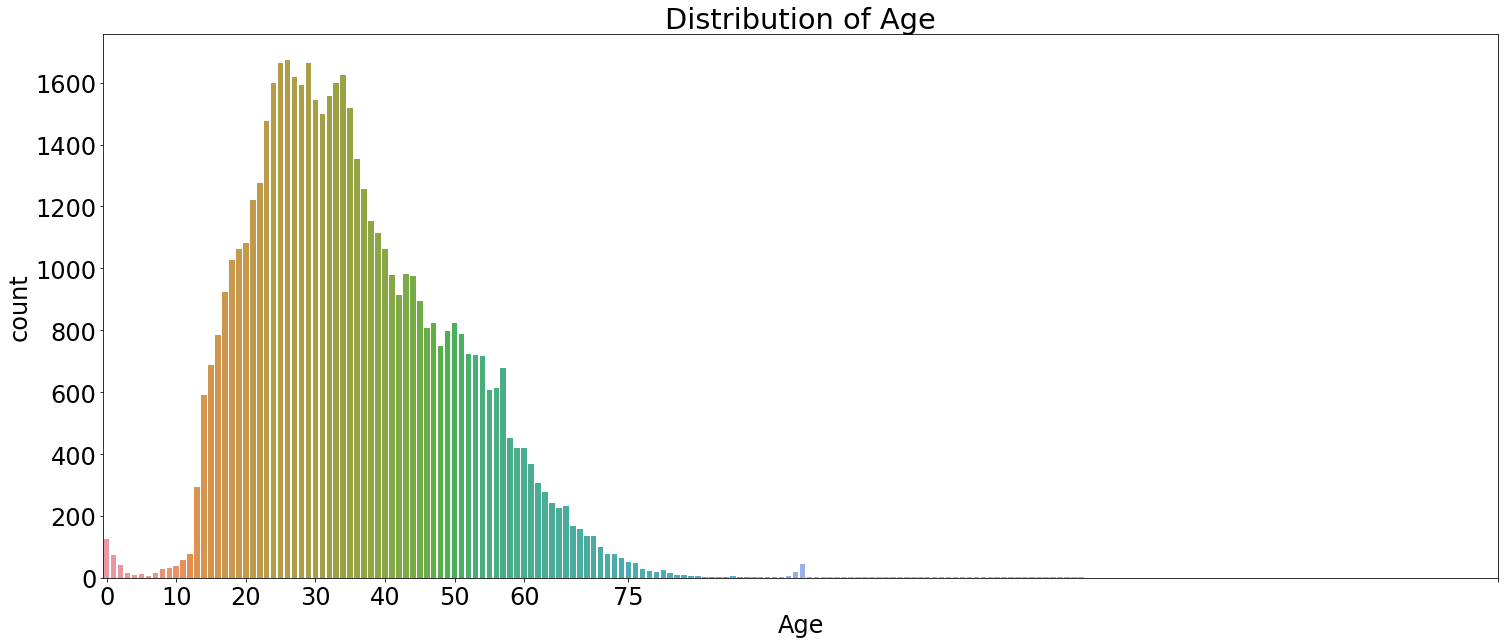

In [31]:
sns.countplot(x='Age',data=df_unique_users_aged)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 75, 200])
plt.title('Distribution of Age')
plt.show()

The most common ages vary from 20-39. Group ages may be formed. This adjustment can be further used to observe which books have been most frequently rated for a given age group. Based on the results, the missing age values might be replaced with suitable age groups by taking the books into consideration.

> Form age groups in an additional column in the foundational dataset

In [32]:
bins = [np.nan, df['Age'].min()-1, 9, 19, 24, 29, 34, 39, 49, 59, 69, 79, df['Age'].max()]
labels = ['NaN', '0-9', '10-19', '20-24', '25-29', '30-34', '35-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['agerange'] = pd.cut(df.Age, bins, labels = labels, include_lowest = True)

In [33]:
df

,User-ID,ISBN,Book-Rating,Location,city,state,country,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,agerange
0,276725,034545104X,0,"tyler, texas, usa",tyler,texas,usa,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,NaN
1,2313,034545104X,5,"cincinnati, ohio, usa",cincinnati,ohio,usa,23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,20-24
2,6543,034545104X,0,"strafford, missouri, usa",strafford,missouri,usa,34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,30-34
3,8680,034545104X,5,"st. charles county, missouri, usa",st. charles county,missouri,usa,2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,0-9
4,10314,034545104X,9,"beaverton, oregon, usa",beaverton,oregon,usa,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,"fort lee, new jersey, usa",fort lee,new jersey,usa,NaN,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,NaN
1031132,276688,1575660792,7,"fort lee, new jersey, usa",fort lee,new jersey,usa,NaN,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,NaN
1031133,276690,0590907301,0,"wakeman, ohio, usa",wakeman,ohio,usa,43.0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,40-49
1031134,276704,0679752714,0,"cedar park, texas, usa",cedar park,texas,usa,NaN,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,NaN


Adjust the position of the newly added column to be right after column Age

In [34]:
ageRanges = df['agerange']
df.drop(labels=['agerange'], axis=1, inplace = True)
df.insert(8, 'agerange', ageRanges)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   User-ID              1031136 non-null  int64   
 1   ISBN                 1031136 non-null  object  
 2   Book-Rating          1031136 non-null  int64   
 3   Location             1031136 non-null  object  
 4   city                 1031136 non-null  object  
 5   state                1031136 non-null  object  
 6   country              1006941 non-null  object  
 7   Age                  753301 non-null   float64 
 8   agerange             753301 non-null   category
 9   Book-Title           1031136 non-null  object  
 10  Book-Author          1031136 non-null  object  
 11  Year-Of-Publication  1031136 non-null  object  
 12  Publisher            1031136 non-null  object  
 13  Image-URL-S          1031136 non-null  object  
 14  Image-URL-M          1031136 non-n

NaN values count is equal both for age and agerange columns, as it should. Now, replace NaN values in column 'agerange' with most common value based on each book.

In [36]:
df.loc[df['agerange'].isna(), 'agerange'] = df.groupby(['ISBN'])['agerange'].transform(lambda x: x.mode()[0] if any(x.mode()) else np.nan)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   User-ID              1031136 non-null  int64   
 1   ISBN                 1031136 non-null  object  
 2   Book-Rating          1031136 non-null  int64   
 3   Location             1031136 non-null  object  
 4   city                 1031136 non-null  object  
 5   state                1031136 non-null  object  
 6   country              1006941 non-null  object  
 7   Age                  753301 non-null   float64 
 8   agerange             984589 non-null   category
 9   Book-Title           1031136 non-null  object  
 10  Book-Author          1031136 non-null  object  
 11  Year-Of-Publication  1031136 non-null  object  
 12  Publisher            1031136 non-null  object  
 13  Image-URL-S          1031136 non-null  object  
 14  Image-URL-M          1031136 non-n

There are still some NaN values for agerange attribute, which is caused by having only NaN values for 'Age' for a given ISBN number. Drop these rows as they are a few, but most importantly, they do not provide comprehensive knowledge.

In [38]:
df = df[df['agerange'].notnull()]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984589 entries, 0 to 1031133
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   User-ID              984589 non-null  int64   
 1   ISBN                 984589 non-null  object  
 2   Book-Rating          984589 non-null  int64   
 3   Location             984589 non-null  object  
 4   city                 984589 non-null  object  
 5   state                984589 non-null  object  
 6   country              962251 non-null  object  
 7   Age                  753301 non-null  float64 
 8   agerange             984589 non-null  category
 9   Book-Title           984589 non-null  object  
 10  Book-Author          984589 non-null  object  
 11  Year-Of-Publication  984589 non-null  object  
 12  Publisher            984589 non-null  object  
 13  Image-URL-S          984589 non-null  object  
 14  Image-URL-M          984589 non-null  object  
 15 

Now, that all NaN values are eliminated, the problem is that some users have been assigned multiple age ranges. Here is an example of such user with various age ranges:

In [40]:
df[df['User-ID']==276704]

,User-ID,ISBN,Book-Rating,Location,city,state,country,Age,agerange,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
73068,276704,080410526X,0,"cedar park, texas, usa",cedar park,texas,usa,NaN,30-34,All I Really Need to Know,ROBERT FULGHUM,1989,Ivy Books,http://images.amazon.com/images/P/080410526X.0...,http://images.amazon.com/images/P/080410526X.0...,http://images.amazon.com/images/P/080410526X.0...
105942,276704,0345386108,6,"cedar park, texas, usa",cedar park,texas,usa,NaN,40-49,Winter Moon,Dean R. Koontz,1995,Ballantine Books,http://images.amazon.com/images/P/0345386108.0...,http://images.amazon.com/images/P/0345386108.0...,http://images.amazon.com/images/P/0345386108.0...
173137,276704,0446605409,0,"cedar park, texas, usa",cedar park,texas,usa,NaN,50-59,Plum Island,Nelson DeMille,1998,Warner Books,http://images.amazon.com/images/P/0446605409.0...,http://images.amazon.com/images/P/0446605409.0...,http://images.amazon.com/images/P/0446605409.0...
182332,276704,0743211383,7,"cedar park, texas, usa",cedar park,texas,usa,NaN,40-49,Dreamcatcher,Stephen King,2001,Scribner,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...
241754,276704,0425060772,0,"cedar park, texas, usa",cedar park,texas,usa,NaN,35-39,Case of Lucy Bending,Lawrence Sanders,1983,Penguin Putnam~mass,http://images.amazon.com/images/P/0425060772.0...,http://images.amazon.com/images/P/0425060772.0...,http://images.amazon.com/images/P/0425060772.0...
326289,276704,0441007813,0,"cedar park, texas, usa",cedar park,texas,usa,NaN,25-29,Obsidian Butterfly,Laurell K. Hamilton,2000,Ace Books,http://images.amazon.com/images/P/0441007813.0...,http://images.amazon.com/images/P/0441007813.0...,http://images.amazon.com/images/P/0441007813.0...
396570,276704,0440206529,0,"cedar park, texas, usa",cedar park,texas,usa,NaN,30-34,Blessings,Belva Plain,1990,Dell,http://images.amazon.com/images/P/0440206529.0...,http://images.amazon.com/images/P/0440206529.0...,http://images.amazon.com/images/P/0440206529.0...
454320,276704,0312873115,0,"cedar park, texas, usa",cedar park,texas,usa,NaN,25-29,The Land of Laughs : A Novel,Jonathan Carroll,2001,Orb Books,http://images.amazon.com/images/P/0312873115.0...,http://images.amazon.com/images/P/0312873115.0...,http://images.amazon.com/images/P/0312873115.0...
523456,276704,0446353957,0,"cedar park, texas, usa",cedar park,texas,usa,NaN,40-49,Mirror Image,Sandra Brown,1990,Warner Books,http://images.amazon.com/images/P/0446353957.0...,http://images.amazon.com/images/P/0446353957.0...,http://images.amazon.com/images/P/0446353957.0...
543171,276704,0152022597,0,"cedar park, texas, usa",cedar park,texas,usa,NaN,40-49,Nobody's Son,Sean Stewart,2000,Magic Carpet Books,http://images.amazon.com/images/P/0152022597.0...,http://images.amazon.com/images/P/0152022597.0...,http://images.amazon.com/images/P/0152022597.0...


This has happened due to grouping the rows with empty 'Age' cells by 'ISBN' only. Assign the most common 'agerange' value per each user id.

In [41]:
pd.set_option('mode.chained_assignment', None)
df['agerange'] = df.groupby('User-ID')['agerange'].transform(lambda x: x.mode()[0] if x.nunique() > 1 else x)

In [42]:
a = (df.groupby(['User-ID'])['agerange'].nunique() > 1).any()
a

False

There are no more various inputs in column 'agerange' for each user. Check if indeed the most frequent value is taken for the same reader that was exampled above.

In [43]:
df[df['User-ID']==276704]

,User-ID,ISBN,Book-Rating,Location,city,state,country,Age,agerange,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
73068,276704,080410526X,0,"cedar park, texas, usa",cedar park,texas,usa,NaN,40-49,All I Really Need to Know,ROBERT FULGHUM,1989,Ivy Books,http://images.amazon.com/images/P/080410526X.0...,http://images.amazon.com/images/P/080410526X.0...,http://images.amazon.com/images/P/080410526X.0...
105942,276704,0345386108,6,"cedar park, texas, usa",cedar park,texas,usa,NaN,40-49,Winter Moon,Dean R. Koontz,1995,Ballantine Books,http://images.amazon.com/images/P/0345386108.0...,http://images.amazon.com/images/P/0345386108.0...,http://images.amazon.com/images/P/0345386108.0...
173137,276704,0446605409,0,"cedar park, texas, usa",cedar park,texas,usa,NaN,40-49,Plum Island,Nelson DeMille,1998,Warner Books,http://images.amazon.com/images/P/0446605409.0...,http://images.amazon.com/images/P/0446605409.0...,http://images.amazon.com/images/P/0446605409.0...
182332,276704,0743211383,7,"cedar park, texas, usa",cedar park,texas,usa,NaN,40-49,Dreamcatcher,Stephen King,2001,Scribner,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...
241754,276704,0425060772,0,"cedar park, texas, usa",cedar park,texas,usa,NaN,40-49,Case of Lucy Bending,Lawrence Sanders,1983,Penguin Putnam~mass,http://images.amazon.com/images/P/0425060772.0...,http://images.amazon.com/images/P/0425060772.0...,http://images.amazon.com/images/P/0425060772.0...
326289,276704,0441007813,0,"cedar park, texas, usa",cedar park,texas,usa,NaN,40-49,Obsidian Butterfly,Laurell K. Hamilton,2000,Ace Books,http://images.amazon.com/images/P/0441007813.0...,http://images.amazon.com/images/P/0441007813.0...,http://images.amazon.com/images/P/0441007813.0...
396570,276704,0440206529,0,"cedar park, texas, usa",cedar park,texas,usa,NaN,40-49,Blessings,Belva Plain,1990,Dell,http://images.amazon.com/images/P/0440206529.0...,http://images.amazon.com/images/P/0440206529.0...,http://images.amazon.com/images/P/0440206529.0...
454320,276704,0312873115,0,"cedar park, texas, usa",cedar park,texas,usa,NaN,40-49,The Land of Laughs : A Novel,Jonathan Carroll,2001,Orb Books,http://images.amazon.com/images/P/0312873115.0...,http://images.amazon.com/images/P/0312873115.0...,http://images.amazon.com/images/P/0312873115.0...
523456,276704,0446353957,0,"cedar park, texas, usa",cedar park,texas,usa,NaN,40-49,Mirror Image,Sandra Brown,1990,Warner Books,http://images.amazon.com/images/P/0446353957.0...,http://images.amazon.com/images/P/0446353957.0...,http://images.amazon.com/images/P/0446353957.0...
543171,276704,0152022597,0,"cedar park, texas, usa",cedar park,texas,usa,NaN,40-49,Nobody's Son,Sean Stewart,2000,Magic Carpet Books,http://images.amazon.com/images/P/0152022597.0...,http://images.amazon.com/images/P/0152022597.0...,http://images.amazon.com/images/P/0152022597.0...


Values for 'agerange' have been successfully implemented. 

##### Country
There are many rows where country is not specified.

In [44]:
df.loc[df['country'].isna()]

,User-ID,ISBN,Book-Rating,Location,city,state,country,Age,agerange,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
8,39002,034545104X,0,"san jose, ,",san jose,",",None,NaN,30-34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
23,128276,034545104X,5,"los angeles, ,",los angeles,",",None,NaN,30-34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
52,244420,034545104X,8,"kenmore, ,",kenmore,",",None,NaN,40-49,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
54,257492,034545104X,5,"san diego, ,",san diego,",",None,NaN,30-34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
104,115473,0446520802,0,"pennsylvania, ,",pennsylvania,",",None,NaN,25-29,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031033,276538,3770402774,6,"cologne, ,",cologne,",",None,26.0,25-29,"Lucky Luke, Bd.66, Eine Woche Wilder Westen",Rene. Goscinny,1993,"Egmont Ehapa, Berlin",http://images.amazon.com/images/P/3770402774.0...,http://images.amazon.com/images/P/3770402774.0...,http://images.amazon.com/images/P/3770402774.0...
1031034,276538,3805202881,7,"cologne, ,",cologne,",",None,26.0,25-29,Winter-Wanderschaft: Mit 2 Essays Ã¼ber Karl B...,Rolf Vollmann,1977,Wunderlich,http://images.amazon.com/images/P/3805202881.0...,http://images.amazon.com/images/P/3805202881.0...,http://images.amazon.com/images/P/3805202881.0...
1031035,276538,3893312676,0,"cologne, ,",cologne,",",None,26.0,25-29,Familienpolitik: Grundlagen und aktuelle Probl...,Max Wingen,1997,Bundeszentrale fÃ¼r Politische Bildung,http://images.amazon.com/images/P/3893312676.0...,http://images.amazon.com/images/P/3893312676.0...,http://images.amazon.com/images/P/3893312676.0...
1031036,276538,3893313176,0,"cologne, ,",cologne,",",None,26.0,25-29,Wahlen in der Bundesrepublik Deutschland,Karl-Rudolf Korte,1998,Bundeszentrale fÃ¼r Politische Bildung,http://images.amazon.com/images/P/3893313176.0...,http://images.amazon.com/images/P/3893313176.0...,http://images.amazon.com/images/P/3893313176.0...


This information can be extracted from the city. Group by city & replace the missing value in country if there is any row with country specified for the same city.

In [45]:
df.loc[df['country'].isna(), 'country'] = df.groupby(['city'])['country'].transform(lambda x: x.mode()[0] if any(x.mode()) else np.nan)
df.loc[df['country'].isna()]

,User-ID,ISBN,Book-Rating,Location,city,state,country,Age,agerange,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
104,115473,0446520802,0,"pennsylvania, ,",pennsylvania,",",NaN,NaN,25-29,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
1133,54501,0671537458,0,"horseshoe valley, ontario,",horseshoe valley,"ontario,",NaN,NaN,40-49,Waiting to Exhale,Terry McMillan,1995,Pocket,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...
1679,15031,0451167317,0,"santo andre, alentejo,",santo andre,"alentejo,",NaN,NaN,25-29,The Dark Half,Stephen King,1994,Signet Book,http://images.amazon.com/images/P/0451167317.0...,http://images.amazon.com/images/P/0451167317.0...,http://images.amazon.com/images/P/0451167317.0...
2139,125031,043935806X,0,"alburquerque, ,",alburquerque,",",NaN,NaN,40-49,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
2181,164581,043935806X,0,"costa da caparica, ,",costa da caparica,",",NaN,30.0,30-34,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004317,269139,0702215198,0,"lyneham, ,",lyneham,",",NaN,34.0,30-34,Do Polar Bears Experience Religious Ecstasy,Ian Warden,1981,Intl Specialized Book Service Inc,http://images.amazon.com/images/P/0702215198.0...,http://images.amazon.com/images/P/0702215198.0...,http://images.amazon.com/images/P/0702215198.0...
1010729,240438,344254081X,8,"wilfleinsdorf, niederoesterreich,",wilfleinsdorf,"niederoesterreich,",NaN,16.0,10-19,Rosinen im Kopf.,Sarah Kavanagh,1998,Goldmann,http://images.amazon.com/images/P/344254081X.0...,http://images.amazon.com/images/P/344254081X.0...,http://images.amazon.com/images/P/344254081X.0...
1029091,271844,0575057823,8,"elfin forest, ,",elfin forest,",",NaN,93.0,80+,Killers,Laurence Gough,1995,Trafalgar Square Publishing,http://images.amazon.com/images/P/0575057823.0...,http://images.amazon.com/images/P/0575057823.0...,http://images.amazon.com/images/P/0575057823.0...
1029210,272411,0330346164,0,"jerrabomberra, australian capital territory,",jerrabomberra,"australian capital territory,",NaN,32.0,30-34,The Perfect Soldier,Graham Hurley,1996,Pan Macmillan,http://images.amazon.com/images/P/0330346164.0...,http://images.amazon.com/images/P/0330346164.0...,http://images.amazon.com/images/P/0330346164.0...


Most of the rows with NA values in 'country' have been filled. Try to do the same, but instead of grouping by city - group by state.

In [46]:
df.loc[df['country'].isna(), 'country'] = df.groupby(['state'])['country'].transform(lambda x: x.mode()[0] if any(x.mode()) else np.nan)
country_missing = df.loc[df['country'].isna()]
country_missing

,User-ID,ISBN,Book-Rating,Location,city,state,country,Age,agerange,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1679,15031,0451167317,0,"santo andre, alentejo,",santo andre,"alentejo,",NaN,NaN,25-29,The Dark Half,Stephen King,1994,Signet Book,http://images.amazon.com/images/P/0451167317.0...,http://images.amazon.com/images/P/0451167317.0...,http://images.amazon.com/images/P/0451167317.0...
5348,90139,3442443806,8,"nehren, baden-wuerttemberg,",nehren,"baden-wuerttemberg,",NaN,39.0,35-39,Die StÃ?Â¶renfrieds. Geschichten von Leo und P...,Amelie Fried,1999,Goldmann,http://images.amazon.com/images/P/3442443806.0...,http://images.amazon.com/images/P/3442443806.0...,http://images.amazon.com/images/P/3442443806.0...
14072,43873,2290318329,8,"pepinster, liege,",pepinster,"liege,",NaN,43.0,40-49,L'Homme aux cercles bleus,Fred Vargas,2002,J'ai lu,http://images.amazon.com/images/P/2290318329.0...,http://images.amazon.com/images/P/2290318329.0...,http://images.amazon.com/images/P/2290318329.0...
18116,105649,0312983271,8,"boskoop, zuid holland,",boskoop,"zuid holland,",NaN,38.0,35-39,Full House (Janet Evanovich's Full Series),Janet Evanovich,2002,St. Martin's Paperbacks,http://images.amazon.com/images/P/0312983271.0...,http://images.amazon.com/images/P/0312983271.0...,http://images.amazon.com/images/P/0312983271.0...
31452,98274,0446609323,0,"mct, okinawa,",mct,"okinawa,",NaN,30.0,30-34,Black Friday,James Patterson,1989,Warner Vision,http://images.amazon.com/images/P/0446609323.0...,http://images.amazon.com/images/P/0446609323.0...,http://images.amazon.com/images/P/0446609323.0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001789,228904,1567610250,0,"saigon, south vietnam,",saigon,"south vietnam,",NaN,24.0,20-24,10 Minute Guide to Norton Desktop for Windows,Michael L. Miller,1992,Alpha Books,http://images.amazon.com/images/P/1567610250.0...,http://images.amazon.com/images/P/1567610250.0...,http://images.amazon.com/images/P/1567610250.0...
1004278,272411,0091833965,0,"jerrabomberra, australian capital territory,",jerrabomberra,"australian capital territory,",NaN,32.0,30-34,Automatic teller,Carmel Bird,1996,Vintage,http://images.amazon.com/images/P/0091833965.0...,http://images.amazon.com/images/P/0091833965.0...,http://images.amazon.com/images/P/0091833965.0...
1010729,240438,344254081X,8,"wilfleinsdorf, niederoesterreich,",wilfleinsdorf,"niederoesterreich,",NaN,16.0,10-19,Rosinen im Kopf.,Sarah Kavanagh,1998,Goldmann,http://images.amazon.com/images/P/344254081X.0...,http://images.amazon.com/images/P/344254081X.0...,http://images.amazon.com/images/P/344254081X.0...
1029210,272411,0330346164,0,"jerrabomberra, australian capital territory,",jerrabomberra,"australian capital territory,",NaN,32.0,30-34,The Perfect Soldier,Graham Hurley,1996,Pan Macmillan,http://images.amazon.com/images/P/0330346164.0...,http://images.amazon.com/images/P/0330346164.0...,http://images.amazon.com/images/P/0330346164.0...


This manipulation also helped to further remove the missing country values. However, there is still a low amount of missing countries left. How many are these missing countries?

In [47]:
country_missing['state'].nunique()

29

29 missing countries in total. Bear it in mind & if these missing values are needed, use Google to fill them. 

#### Drop unnecessary Age, Location & IMG columns
Drop column 'Age' as the provided values in it have been implemented into the new 'agerange' column that has no NaN values. <br><br>Also, column 'Location' is no longer needed, as the data from it persists in the newly added columns, deriving from it. Furthermore, city and state are too specific information for the purpose of the books recommendation system and it is better to drop these columns as well to avoid distractions.
<br><br>Finally, the last three columns of the combined dataset contain image links, which will not bring value to further modelling. Therefore, it is better to drop these attributes so as to avoid distractions. 

In [48]:
to_drop = ['Age', 'Location', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
df = df.drop(to_drop, axis=1, inplace=False)
df

,User-ID,ISBN,Book-Rating,city,state,country,agerange,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,tyler,texas,usa,30-34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,cincinnati,ohio,usa,20-24,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,strafford,missouri,usa,30-34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,st. charles county,missouri,usa,0-9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,beaverton,oregon,usa,40-49,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...,...,...,...,...
1031120,276681,0140290788,9,chicago,illinois,usa,40-49,Time Out Chicago (Time Out Chicago),Time Out,2000,Penguin Books
1031121,276681,0609806491,7,chicago,illinois,usa,40-49,The Zen of Proposal Writing: An Expert's Stres...,Kitta Reeds,2002,Three Rivers Press (CA)
1031122,276681,0764504444,0,chicago,illinois,usa,40-49,Access 2000 for Windows for Dummies,John Kaufeld,1999,For Dummies
1031123,276681,1931333246,10,chicago,illinois,usa,40-49,Chorus,Kurt Messick,2003,Dry Bones Press


Columns have been successfully deleted.

#### Datatypes
Assign relevant datatypes to the attributes so as to be able to extract accurate information and relations between data.

The current datatypes are as follows:

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984589 entries, 0 to 1031133
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              984589 non-null  int64 
 1   ISBN                 984589 non-null  object
 2   Book-Rating          984589 non-null  int64 
 3   city                 984589 non-null  object
 4   state                984589 non-null  object
 5   country              984486 non-null  object
 6   agerange             984589 non-null  object
 7   Book-Title           984589 non-null  object
 8   Book-Author          984589 non-null  object
 9   Year-Of-Publication  984589 non-null  object
 10  Publisher            984589 non-null  object
dtypes: int64(2), object(9)
memory usage: 130.1+ MB


Most of the columns are represented by object data type, which is too broad. Assign more specific data types to the attributes in the table by taking into consideration the values contained.

Before changing the datatypes, check whether all rows in each column have a respective value - either numeric or string. For the purpose - create two regex validation variables to validate each cell.

> ##### String validation criteria
<br> Apply this criteria to all attributes with expected **numeric values** in order to get rarities, if any.

In [50]:
regexp_str = re.compile('^[a-zA-Z]+$')

In [51]:
mask_str = df['Year-Of-Publication'].astype('str').map(lambda x: bool(regexp_str.match(x)))
df.loc[mask_str]

,User-ID,ISBN,Book-Rating,city,state,country,agerange,Book-Title,Book-Author,Year-Of-Publication,Publisher
918145,137190,2070426769,0,rennes,bretagne,france,30-34,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


Here seems as if book author and year of publication values have been swapped. However, value under 'Publisher' column is also irrelevant. Check how many times does this book occur in the whole table:

In [52]:
df[df['ISBN']=='2070426769']

,User-ID,ISBN,Book-Rating,city,state,country,agerange,Book-Title,Book-Author,Year-Of-Publication,Publisher
918145,137190,2070426769,0,rennes,bretagne,france,30-34,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


Unfortunately, it occurs only once, so the table cannot provide much knowledge on the right values for the. The information presented in many cells of this row is vague, so a better option would be to drop the row instead of trying to find the correct data in Google.

In [53]:
df = df.drop(918145)

df[df['ISBN']=='2070426769']

,User-ID,ISBN,Book-Rating,city,state,country,agerange,Book-Title,Book-Author,Year-Of-Publication,Publisher


Row successfully removed.

>##### Number validation criteria
<br> Apply this criteria to all attributes with expected **string values** in order to get rarities, if any.

In [54]:
regexp = re.compile('^-?[0-9]+$')

###### Book-Author

In [55]:
mask_str = df['Book-Author'].astype('str').map(lambda x: bool(regexp.match(x)))
df.loc[mask_str]

,User-ID,ISBN,Book-Rating,city,state,country,agerange,Book-Title,Book-Author,Year-Of-Publication,Publisher
949657,169663,078946697X,0,towson,maryland,usa,40-49,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
949658,227771,078946697X,7,savion,n/a,israel,10-19,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...


Similar situation like the 'Year-Of-Publication' case above where values are not in their right place. Again, these are only 2 books, so no harm would be done to the system if the two rows are dropped.

In [56]:
df = df.drop(949657)
df = df.drop(949658)

###### Book-Title

In [57]:
mask_str = df['Book-Title'].astype('str').map(lambda x: bool(regexp.match(x)))
df.loc[mask_str]

,User-ID,ISBN,Book-Rating,city,state,country,agerange,Book-Title,Book-Author,Year-Of-Publication,Publisher
119699,278158,0451524934,0,cambridge,massachusetts,usa,20-24,1984,George Orwell,1990,Signet Book
119700,254,0451524934,9,minneapolis,minnesota,usa,20-24,1984,George Orwell,1990,Signet Book
119701,1706,0451524934,10,olympia,washington,usa,25-29,1984,George Orwell,1990,Signet Book
119702,2179,0451524934,8,sunderland,massachusetts,usa,30-34,1984,George Orwell,1990,Signet Book
119703,2198,0451524934,10,philadelphia,pennsylvania,usa,20-24,1984,George Orwell,1990,Signet Book
...,...,...,...,...,...,...,...,...,...,...,...
995548,217845,0743435427,10,whitby,ontario,canada,30-34,1633,David Weber,2002,Baen
995549,243077,0743435427,0,ann arbor,michigan,usa,30-34,1633,David Weber,2002,Baen
1011260,241202,0582060184,0,nuneaton,england,united kingdom,10-19,1984,George Orwell,1991,Longman Publishing Group
1025342,264149,8423328651,10,el puerto de santa maria,cadiz,spain,25-29,1984,George Orwell,1998,La Marca Editora


In this case, the numbers in books cells are actual book titles, so there is no need for worries regarding the relevancy of the values.

###### Publisher

In [58]:
mask_str = df['Publisher'].astype('str').map(lambda x: bool(regexp.match(x)))
df.loc[mask_str]

,User-ID,ISBN,Book-Rating,city,state,country,agerange,Book-Title,Book-Author,Year-Of-Publication,Publisher
947625,166860,2264034173,7,paris,n/a,france,40-49,Un troublant retour,Patricia Wentworth,2002,37547
1025920,265276,0967389305,8,missoula,montana,usa,35-39,Restoring Intimacy: The Patient's Guide to Mai...,Drew Pinsky,1999,3


These values are irrelevant - drop these two rows.

In [59]:
df = df.drop(947625)
df = df.drop(1025920)

###### City

In [60]:
mask_str = df['city'].astype('str').map(lambda x: bool(regexp.match(x)))
df.loc[mask_str]

,User-ID,ISBN,Book-Rating,city,state,country,agerange,Book-Title,Book-Author,Year-Of-Publication,Publisher
30794,183556,0440236673,0,41017,kentucky,usa,40-49,The Brethren,John Grisham,2000,Island
64265,266829,0898156122,8,05680,vermont,usa,30-34,Why Cats Paint: A Theory of Feline Aesthetics,Heather Busch,1994,Ten Speed Press
224443,254451,0142000663,7,95476,california,usa,30-34,The Grapes of Wrath: John Steinbeck Centennial...,John Steinbeck,2002,Penguin Books
282344,31181,006109028X,0,0000000000000000,missouri,usa,25-29,Sharpe's Devil,Bernard Cornwell,1993,HarperTorch
406489,8711,8401427517,0,29170,málaga,spain,20-24,Cronica De Una Muerte Anunciada/Chronicle of a...,Gabriel Garacia Marquez,1994,"Plaza &amp; Janes Editores, S.A."
415451,67497,3442440351,7,65439,hessen,germany,35-39,Die Augen der Nacht.,Andrew Klavan,1998,Goldmann
418667,67497,3442447038,8,65439,hessen,germany,35-39,Wellenbrecher.,Minette Walters,2000,Goldmann
434914,67497,3442442540,6,65439,hessen,germany,35-39,Der Verehrer.,Charlotte Link,1998,Goldmann
457157,67497,0345405072,9,65439,hessen,germany,35-39,Lost World,Michael Crichton,1996,Ballantine Books
479715,31178,0553283103,0,000000000000000000,missouri,usa,50-59,As Crime Goes by,Diane K. Shah,1993,Bantam Books


There are a few rows where city is not specified or is placed in column 'state'. This information can be extracted from the state. Even though there might be many cities in a state, the approach of replacing the missing city with most frequent value for the given state, is chosen due to the fact that the rows above are of limited amount and this approach will not harm the conveyance of the dataset. Group by stat & replace the missing value in city if there is any row with city specified for the same state.

In [61]:
df.loc[mask_str, 'city'] = df.groupby(['state'])['city'].transform(lambda x: x.mode()[0] if any(x.mode()) else x)
mask_str = df['city'].astype('str').map(lambda x: bool(regexp.match(x)))
df.loc[mask_str]

,User-ID,ISBN,Book-Rating,city,state,country,agerange,Book-Title,Book-Author,Year-Of-Publication,Publisher


Seems as if all cities have been filled in. Therefore, there are indeed other rows where the city value is present for the states listed in the extract above with missing city valus. Check whether the values have been correctly filled in for example, for state Hessen in Germany - is city successfully filled in:

In [62]:
df[df['User-ID'] == 67497]

,User-ID,ISBN,Book-Rating,city,state,country,agerange,Book-Title,Book-Author,Year-Of-Publication,Publisher
415451,67497,3442440351,7,ginsheim,hessen,germany,35-39,Die Augen der Nacht.,Andrew Klavan,1998,Goldmann
418667,67497,3442447038,8,ginsheim,hessen,germany,35-39,Wellenbrecher.,Minette Walters,2000,Goldmann
434914,67497,3442442540,6,ginsheim,hessen,germany,35-39,Der Verehrer.,Charlotte Link,1998,Goldmann
457157,67497,0345405072,9,ginsheim,hessen,germany,35-39,Lost World,Michael Crichton,1996,Ballantine Books
501911,67497,3453025237,6,ginsheim,hessen,germany,35-39,Der Talisman. Roman.,Stephen King,2000,Heyne
505588,67497,0441646611,0,ginsheim,hessen,germany,35-39,Cat-A-Lyst,Alan Dean Foster,1991,Ace Books
533556,67497,3404120604,9,ginsheim,hessen,germany,35-39,Die Kinder des Gral.,Peter Berling,1994,LÃ?Â¼bbe
588227,67497,3453099737,7,ginsheim,hessen,germany,35-39,Azrael.,Wolfgang Hohlbein,1996,Heyne
628087,67497,3453172124,7,ginsheim,hessen,germany,35-39,DÃ?Â¤monenlicht.,Marion Zimmer Bradley,2000,Heyne
791901,67497,3129200525,0,ginsheim,hessen,germany,35-39,Der Mann der sich verbarg: Nachforschungen Ã¼b...,Frederik Hetmann,1983,E. Klett


Cities are sucessfully filled in.

###### State

In [63]:
mask_str = df['state'].astype('str').map(lambda x: bool(regexp.match(x)))
df.loc[mask_str]

,User-ID,ISBN,Book-Rating,city,state,country,agerange,Book-Title,Book-Author,Year-Of-Publication,Publisher


###### Country

In [64]:
mask_str = df['country'].astype('str').map(lambda x: bool(regexp.match(x)))
df.loc[mask_str]

,User-ID,ISBN,Book-Rating,city,state,country,agerange,Book-Title,Book-Author,Year-Of-Publication,Publisher


State and country do not have irrelevant numeric values.

###### Adjust the data types
Now that all values have been taken into consideration, assign relevant data types to the attributes.

In [65]:
df['ISBN'] = df['ISBN'].astype('string')
df['Book-Title'] = df['Book-Title'].astype('string')
df['Book-Author'] = df['Book-Author'].astype('string')
df['Year-Of-Publication'] = df['Year-Of-Publication'].astype('int32')
df['Publisher'] = df['Publisher'].astype('string')
df['city'] = df['city'].astype('string')
df['state'] = df['state'].astype('string')
df['country'] = df['country'].astype('string')
df['agerange'] = df['agerange'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984584 entries, 0 to 1031133
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   User-ID              984584 non-null  int64   
 1   ISBN                 984584 non-null  string  
 2   Book-Rating          984584 non-null  int64   
 3   city                 984584 non-null  string  
 4   state                984584 non-null  string  
 5   country              984481 non-null  string  
 6   agerange             984584 non-null  category
 7   Book-Title           984584 non-null  string  
 8   Book-Author          984584 non-null  string  
 9   Year-Of-Publication  984584 non-null  int32   
 10  Publisher            984584 non-null  string  
dtypes: category(1), int32(1), int64(2), string(7)
memory usage: 119.8 MB


The dataframe above represents the **foundation of the books recommendation system**.

#### Quality 
Check the quality of the data on a few topics.

>Check if the same ISBN number has different titles:

In [66]:
df.loc[np.where(df.groupby('ISBN')['Book-Title'].nunique() > 1)]

,User-ID,ISBN,Book-Rating,city,state,country,agerange,Book-Title,Book-Author,Year-Of-Publication,Publisher


There are no rows where book title variates for the same isbn number, which implies relevancy of the data.

>Check if the same title has different ISBN numbers:

In [67]:
(df.groupby('Book-Title')['ISBN'].nunique() > 1).any()

True

There are books with various ISBN numbers for the same title. According to *Wikipedia*, an ISBN is assigned to each separate edition and variation (except reprintings) of a publication. For example, an e-book, a paperback and a hardcover edition of the same book will each have a different ISBN. 

This should be further explored and taken care of to avoid ambiguity in case such is present.

> Check for duplicated rows

In [68]:
df.loc[df.duplicated() == True]

,User-ID,ISBN,Book-Rating,city,state,country,agerange,Book-Title,Book-Author,Year-Of-Publication,Publisher


There are no duplicated rows. 

#### Naming convention
Finally, rename the newly added columns - city, state, country & agerange to match with the naming convention of the other attributes. In other words, set first letter of each word to uppercase.

In [69]:
df = df.rename(columns={'city': 'City', 
                        'state': 'State', 
                        'country': 'Country',
                        'agerange': 'Age-Range'})
df

,User-ID,ISBN,Book-Rating,City,State,Country,Age-Range,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,tyler,texas,usa,30-34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,cincinnati,ohio,usa,20-24,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,strafford,missouri,usa,30-34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,st. charles county,missouri,usa,0-9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,beaverton,oregon,usa,40-49,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...,...,...,...,...
1031120,276681,0140290788,9,chicago,illinois,usa,40-49,Time Out Chicago (Time Out Chicago),Time Out,2000,Penguin Books
1031121,276681,0609806491,7,chicago,illinois,usa,40-49,The Zen of Proposal Writing: An Expert's Stres...,Kitta Reeds,2002,Three Rivers Press (CA)
1031122,276681,0764504444,0,chicago,illinois,usa,40-49,Access 2000 for Windows for Dummies,John Kaufeld,1999,For Dummies
1031123,276681,1931333246,10,chicago,illinois,usa,40-49,Chorus,Kurt Messick,2003,Dry Bones Press


This dataset is prepared for analysis and enrichment.

-----------------------------------------------------------------------------------------------------------------------------

#### Extract the dataset to use it for further data preparation & modeling

In [70]:
df.to_csv('CleanedFoundation.csv', index = False)

-----------------------------------------------------------------------------------------------------------------------------

### Analyse

Take a view at the unique count of rated books per each user:

In [71]:
df.groupby('User-ID')['ISBN'].nunique().sort_values(ascending=False)

User-ID
11676     10549
198711     6456
153662     5814
98391      5779
35859      4757
          ...  
109961        1
207583        1
109945        1
109942        1
2             1
Name: ISBN, Length: 88725, dtype: int64

There are some users with a lot of rated books. For example, the first user id has rated 10 549 unique books as previewed below.

In [72]:
df.loc[df['User-ID'] == 11676]

,User-ID,ISBN,Book-Rating,City,State,Country,Age-Range,Book-Title,Book-Author,Year-Of-Publication,Publisher
69,11676,0446520802,10,n/a,n/a,n/a,40-49,The Notebook,Nicholas Sparks,1996,Warner Books
189,11676,038550120X,10,n/a,n/a,n/a,40-49,A Painted House,JOHN GRISHAM,2001,Doubleday
506,11676,0449006522,8,n/a,n/a,n/a,40-49,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books
618,11676,0553561618,0,n/a,n/a,n/a,40-49,Dark Paradise,TAMI HOAG,1994,Bantam
755,11676,055356451X,9,n/a,n/a,n/a,40-49,Night Sins,TAMI HOAG,1995,Bantam
...,...,...,...,...,...,...,...,...,...,...,...
504555,11676,9812327975,7,n/a,n/a,n/a,40-49,Notes From an Even Smaller Island,Neil Humphreys,2001,Times Editions
504562,11676,9879397274,7,n/a,n/a,n/a,40-49,Desde Mi Cielo,Alice Sebold,2003,Mondadori (IT)
504568,11676,987960170X,5,n/a,n/a,n/a,40-49,Kolon,Raul Alberto Lilloy,1996,Ediciones Riverrum
504570,11676,9974643058,7,n/a,n/a,n/a,40-49,La piel dura,Andrea BlanquÃ©,1999,Planeta


Count what is the mean value of rated books per person:

In [73]:
df.groupby('User-ID')['ISBN'].nunique().mean()

11.097030149337842

Approximately, 11-12 books rated per person, which is quite a good amount for further modeling. Dive deeper into the ratings:

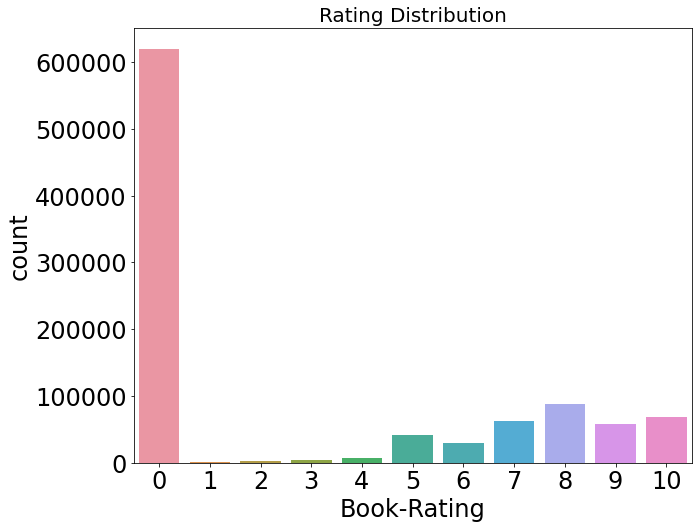

In [74]:
plt.figure(figsize=(10,8))
sns.countplot(x='Book-Rating',data=df)
plt.title('Rating Distribution',size=20)
plt.show()

In [75]:
df['Book-Rating'].value_counts()

0     620318
8      87871
10     67918
7      63157
9      58704
5      40899
6      30053
4       7216
3       4850
2       2235
1       1363
Name: Book-Rating, dtype: int64

It can be noticed that the count of ratings equal to 0 is significantly high, which should be further investigated.
<br><br> Take a look at the distribution of ratings ignoring the 0 cells:

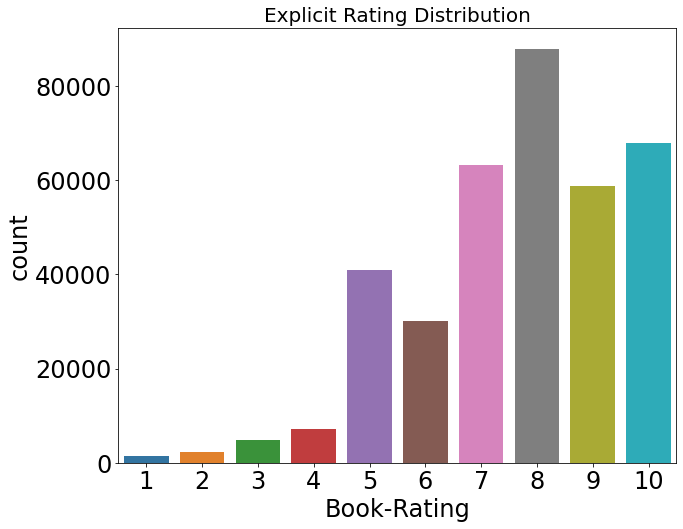

In [76]:
df_xtrct=df[['Book-Rating']].copy()
df_xtrct.dtypes
df_xtrct = df_xtrct[df_xtrct['Book-Rating'] != 0]
plt.figure(figsize=(10,8))
sns.countplot(x='Book-Rating',data=df_xtrct)
plt.title('Explicit Rating Distribution',size=20)
plt.show()

It can be deducted that users generally give higher ratings to books. 
<br><br> Now, discover more about the publication year of the books present in the dataset.

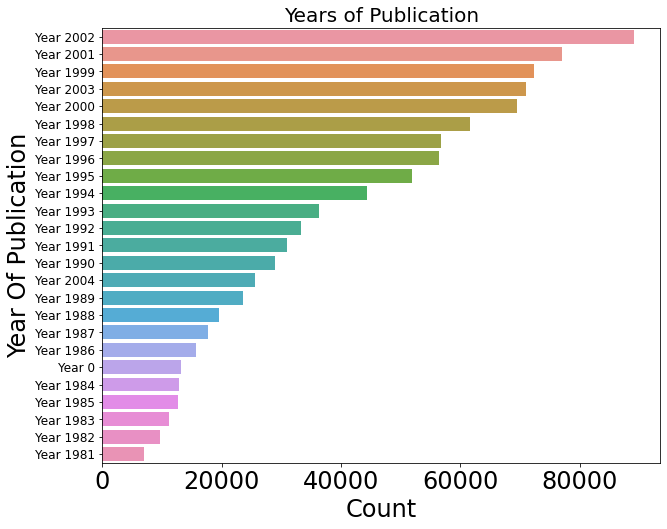

In [77]:
df_xtrct=df[['Year-Of-Publication']].copy()
df_xtrct['Year-Of-Publication'] = df_xtrct['Year-Of-Publication'].astype(int).astype(str)
df_xtrct=df_xtrct['Year-Of-Publication'].value_counts().head(25).reset_index()
df_xtrct.columns=['Year','Count']
df_xtrct['Year']='Year '+df_xtrct['Year']

plt.figure(figsize=(10,8))
sns.barplot(x='Count',y='Year',data=df_xtrct)
plt.ylabel('Year Of Publication')
plt.yticks(size=12)
plt.title('Years of Publication',size=20)
plt.show()

The books in the dataset are from 2004 and below. Most popular books have been originally published in 1980 or sooner. Therefore, the dataset is dealing with older books. The final product will be relevant for recommending past books at this initial point.
<br>Also, as a remark, there are some rows where year is 0, which should be taken care of.
<br><br> Focus on the most commonly rated, therefore read books:

In [78]:
def barplot(df,col,l):
    df_xtrct=df[col].value_counts().head(25).reset_index()
    df_xtrct.columns=[col,'Count']

    plt.figure(figsize=(10,12))
    sns.barplot(x='Count',y=col,data=df_xtrct)
    plt.ylabel(l)
    plt.title(l,size=20)
    plt.show()

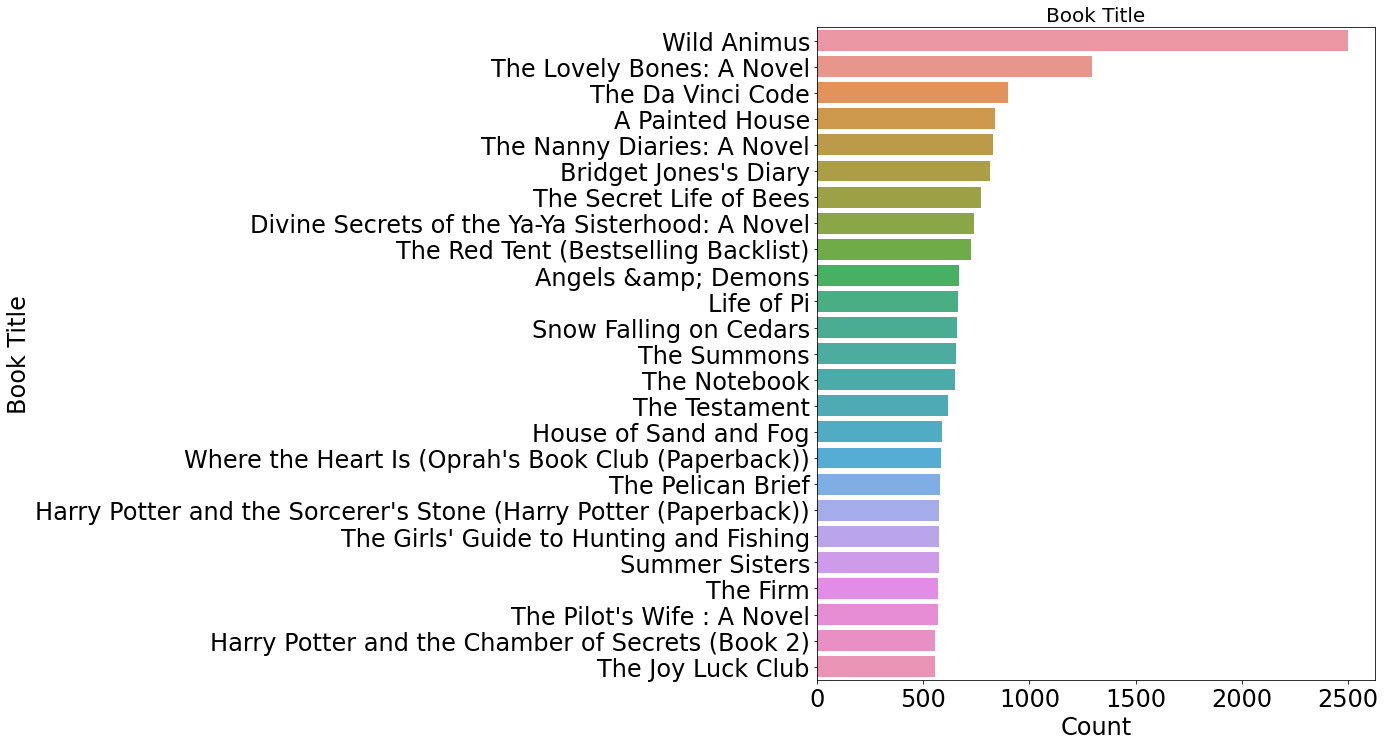

In [79]:
barplot(df,'Book-Title','Book Title')

The first book is udoubtedly popular. Let's look at it more closely:

In [80]:
df.loc[df['Book-Title'] == 'Wild Animus']

,User-ID,ISBN,Book-Rating,City,State,Country,Age-Range,Book-Title,Book-Author,Year-Of-Publication,Publisher
9617,276925,0971880107,0,barcelona,barcelona,spain,20-24,Wild Animus,Rich Shapero,2004,Too Far
9618,276939,0971880107,0,poissy,yvelines,france,20-24,Wild Animus,Rich Shapero,2004,Too Far
9619,276954,0971880107,0,freiburg,baden-wuerttemberg,germany,40-49,Wild Animus,Rich Shapero,2004,Too Far
9620,277042,0971880107,2,hiram,georgia,usa,30-34,Wild Animus,Rich Shapero,2004,Too Far
9621,277157,0971880107,0,garden grove,california,usa,70-79,Wild Animus,Rich Shapero,2004,Too Far
...,...,...,...,...,...,...,...,...,...,...,...
12114,275793,0971880107,0,alanta,georgia,usa,35-39,Wild Animus,Rich Shapero,2004,Too Far
12115,276113,0971880107,7,&#321;ód&#378;,&#322;ódzkie,poland,20-24,Wild Animus,Rich Shapero,2004,Too Far
12116,276147,0971880107,0,genova,liguria,italy,25-29,Wild Animus,Rich Shapero,2004,Too Far
12117,276487,0971880107,0,teruel,aragon,spain,20-24,Wild Animus,Rich Shapero,2004,Too Far


People from all over the world and age groups read it. However, it has many rating values of 0, which has been posed as a question above and should be solved.
<br><br> Get an overview of most common authors:

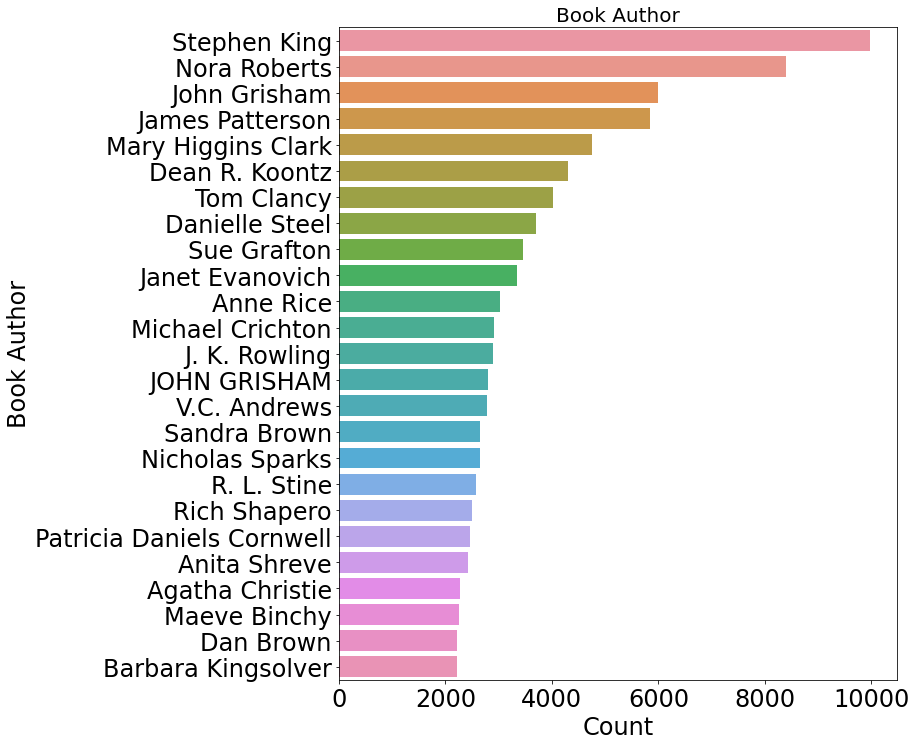

In [81]:
barplot(df,'Book-Author','Book Author')

The author of the most common book - Rich Shapero is positioned lower among the top rated authors. However, work of Stephen King lead among users tastes.

Get a basic knowledge of the publishing agencies, too:

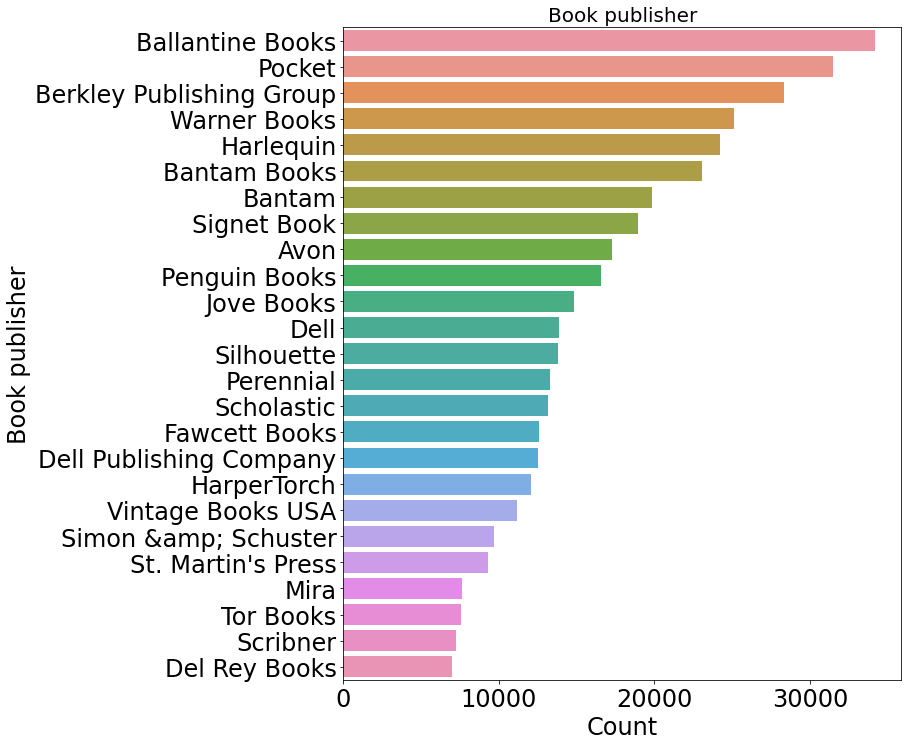

In [82]:
barplot(df,'Publisher','Book publisher')

## Conclusion
There are many features suitable for further data preparation and enough knowledge can be extracted from the data for the purpose of developing the books recommendation system. If the technology is deployed, it will initially be specific to older books until it is updated by new users and with newer books. The 0 values in attribute 'Book-Rating' are the only matter that may or may not be a setback and it should be further dealt with as this column is fundamental for developing the system. In addition, it has been discovered that there are variations of the ISBN numbers for the same title regarding some books, which is worth the attention to prevent possible ambiguity.
<br><br> The target product outcome is recommendation of books. Content-based filtering for recommending overall popular and highly rated books that are similar can be applied using features like book title, author, genres & publication year. The latter has some unprovided values. These values should be either fixed or this attribute should be ignored. Furthermore, Collaborative filtering can be applied to make the system more personalized by using provided ratings to detect user taste.  
<br><br> To summarise, the above mentioned problems and judgements should serve as a foundation for the Data Preparation.